In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset=randn(25)

(0, 1)

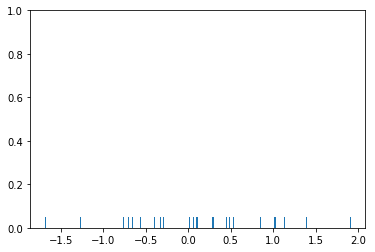

In [5]:
sns.rugplot(dataset)
plt.ylim(0,1)

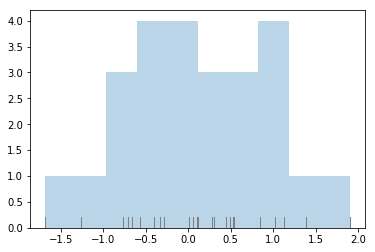

In [11]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset,color="0.5")

(0, 1)

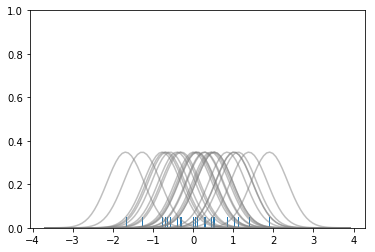

In [13]:
sns.rugplot(dataset)
x_min=dataset.min()-2
x_max=dataset.max()+2
x_axis=np.linspace(x_min,x_max,100)
bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**0.2
kernel_list=[]
for data_point in dataset:
    #Create kernel for each point and append it to kernel_list
    kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel=kernel*0.4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
plt.ylim(0,1)


Text(0.5,0.98,u'Sum of the basis functions')

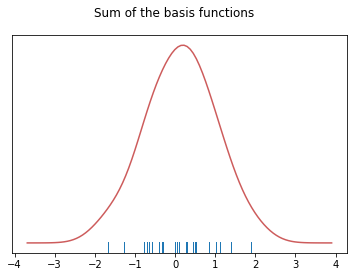

In [14]:
sum_of_kde=np.sum(kernel_list,axis=0)
fig=plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

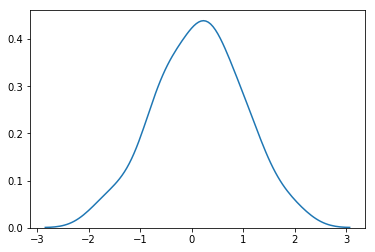

In [15]:
sns.kdeplot(dataset)

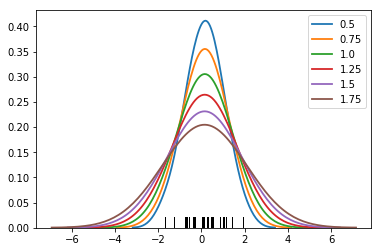

In [16]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

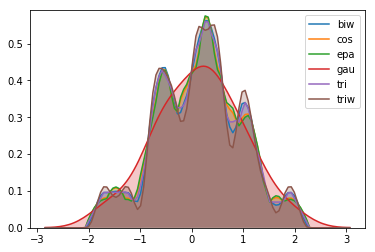

In [19]:
kernel_options=['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

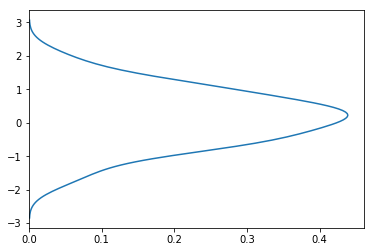

In [20]:
sns.kdeplot(dataset,vertical=True)

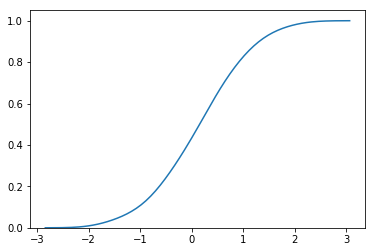

In [21]:
sns.kdeplot(dataset,cumulative=True)

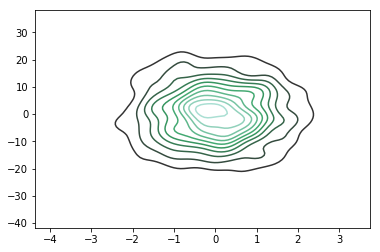

In [23]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)
dframe=pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

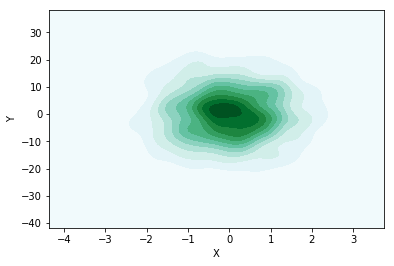

In [25]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

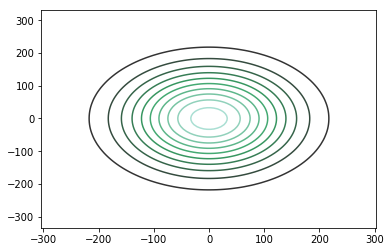

In [32]:
sns.kdeplot(dframe,bw=100)

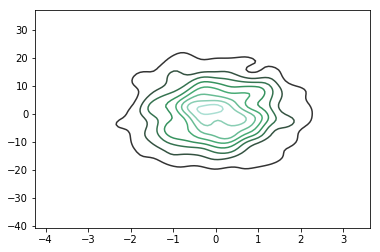

In [33]:
sns.kdeplot(dframe,bw='silverman')

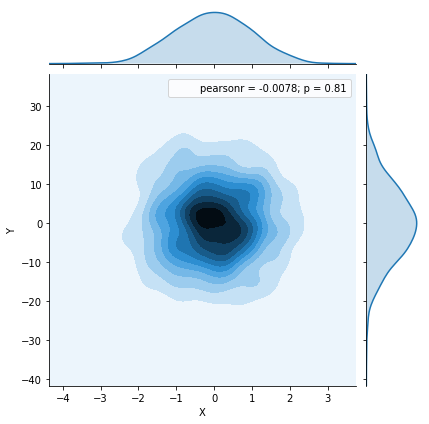

In [35]:
sns.jointplot('X','Y',dframe,kind='kde')